In [1]:
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from helper_functions import plot_supervised_model

As the final example of a supervised machine learning model, we'll look at K-Nearest Neigbor Classifier and how changing the number of neighbors and the weighting scheme influences model performance.

First, load the same dataset as in the previous example.

In [2]:
iris_dataset = load_iris()
X = iris_dataset.data
y = iris_dataset.target

### K-Nearest Neighbors

In [3]:
models = [('2 Neighbors Uniform Weights', KNeighborsClassifier(n_neighbors=2, weights='uniform')),
          ('5 Neighbors Uniform Weights', KNeighborsClassifier(n_neighbors=5, weights='uniform')),
          ('15 Neighbors Uniform Weights', KNeighborsClassifier(n_neighbors=15, weights='uniform'))]

In [4]:
X_sub = X[:, :3]
X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.2, random_state=42)

In [5]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name + ' Accuracy: ' + str(accuracy_score(y_pred, y_test)))

2 Neighbors Uniform Weights Accuracy: 0.9
5 Neighbors Uniform Weights Accuracy: 0.933333333333
15 Neighbors Uniform Weights Accuracy: 0.966666666667


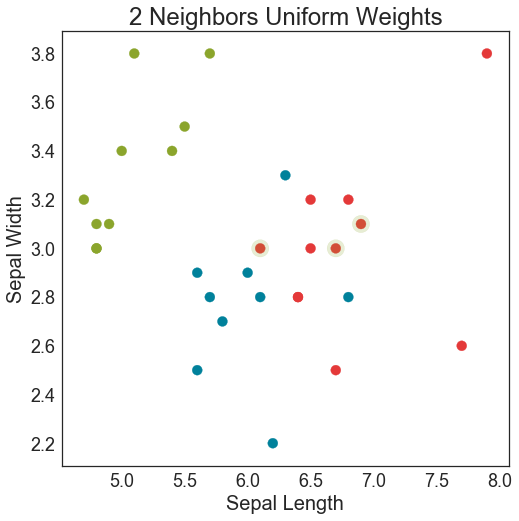

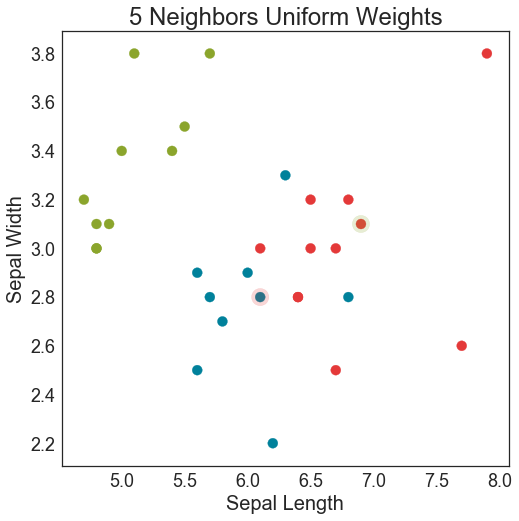

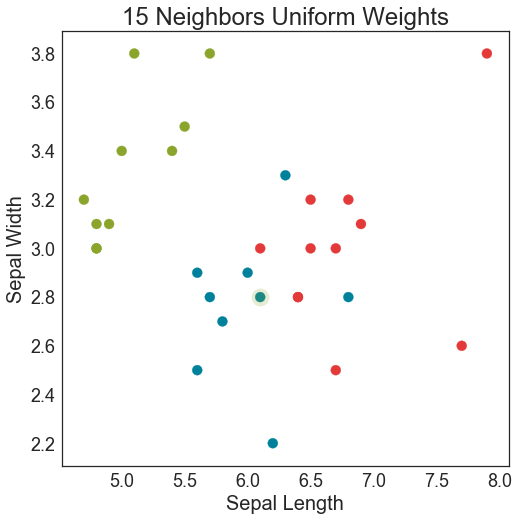

In [6]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plot_supervised_model(name, model, X_test, y_test, y_pred)

Train the KNN model with weights that are inversely proportional to distance (link to documentation, or tell them weights='distance')

In [7]:
models = [('2 Neighbors Inverse Distance Weights', KNeighborsClassifier(n_neighbors=2, weights='distance')),
          ('5 Neighbors Inverse Distance Weights', KNeighborsClassifier(n_neighbors=5, weights='distance')),
          ('15 Neighbors Inverse Distance Weights', KNeighborsClassifier(n_neighbors=15, weights='distance'))]

2 Neighbors Inverse Distance Weights Accuracy: 0.933333333333


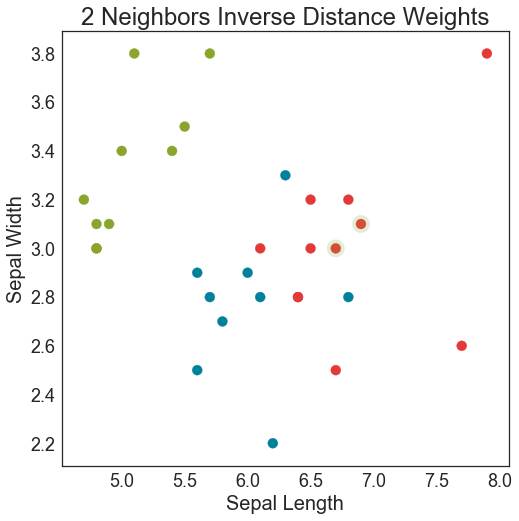

5 Neighbors Inverse Distance Weights Accuracy: 0.933333333333


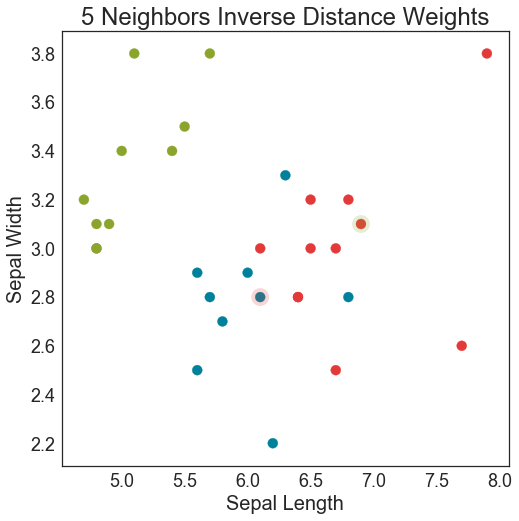

15 Neighbors Inverse Distance Weights Accuracy: 1.0


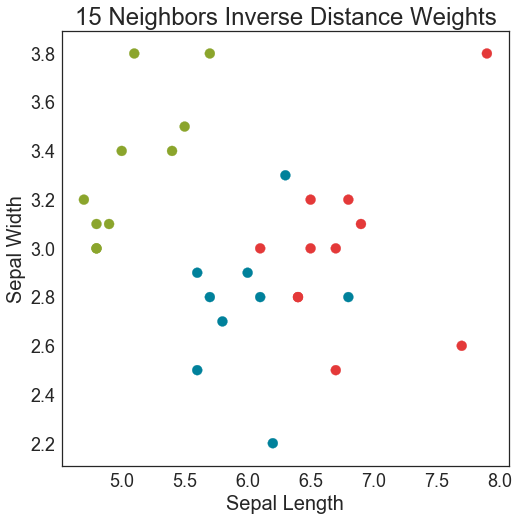

In [8]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name + ' Accuracy: ' + str(accuracy_score(y_pred, y_test)))
    plot_supervised_model(name, model, X_test, y_test, y_pred)